# In class Activity 1

# 1)

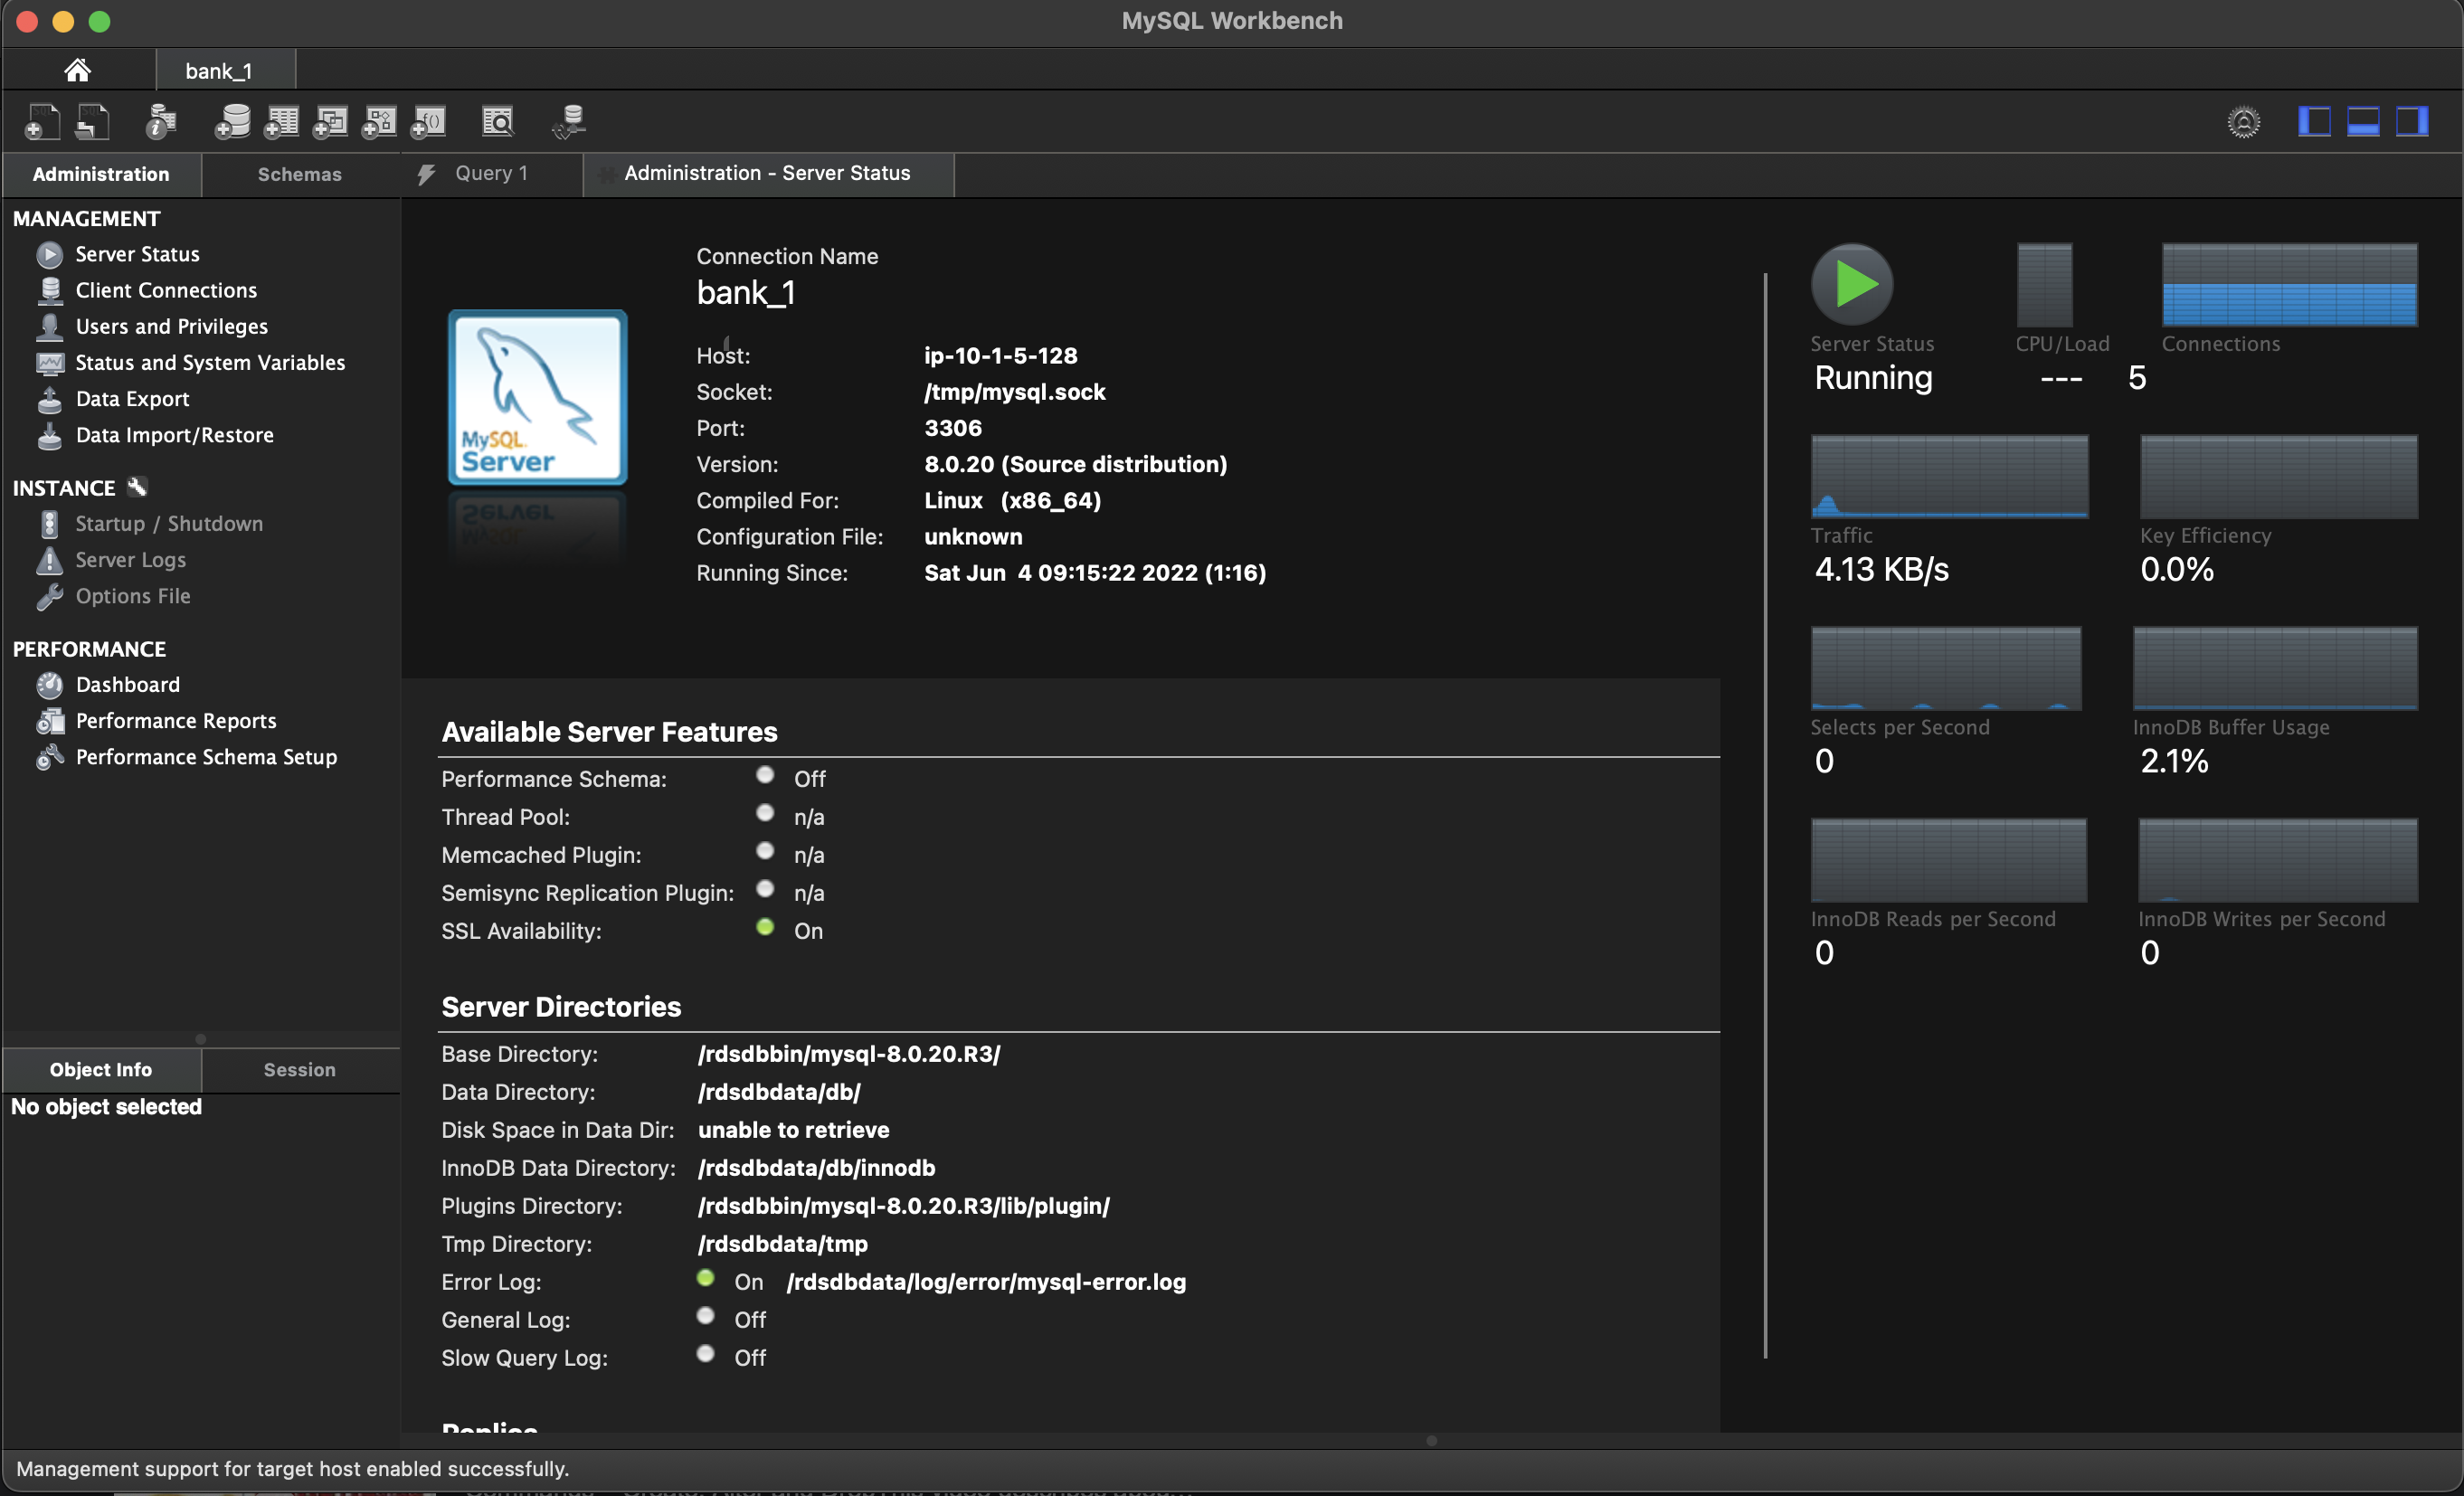

In [28]:
import mysql.connector
def main1():
    host = "bank.cw2w4gcvc1md.us-east-1.rds.amazonaws.com"
    user = "Ankur"
    password = open("credentials.txt").read()
    conn = mysql.connector.connect(host=host, 
                                    user=user, 
                                    password = password)
    if conn.is_connected() == True:
        print("Connection Successful")
    conn.close()  
main1()

Connection Successful


# 2)

```sql
CREATE TABLE `branch` (
  `branch_name` char(25) PRIMARY KEY,
  `branch_city` char(25),
  `assets` varchar(30)
);

CREATE TABLE `account` (
  `account_number` int PRIMARY KEY,
  `branch_name` char(20),
  `balance` float(2)
);

CREATE TABLE `depositor` (
  `customer_name` char(30),
  `account_number` int,
  PRIMARY KEY (`customer_name`, `account_number`)
);

CREATE TABLE `customer` (
  `customer_name` char(30) PRIMARY KEY,
  `customer_street` varchar(50),
  `customer_city` char(20)
);

CREATE TABLE `loan` (
  `loan_number` varchar(40) PRIMARY KEY,
  `branch_name` char(20),
  `amount` float(2)
);

CREATE TABLE `borrower` (
  `customer_name` char(30),
  `loan_number` varchar(40),
  PRIMARY KEY (`customer_name`, `loan_number`)
);

ALTER TABLE `loan` ADD FOREIGN KEY (`loan_number`) REFERENCES `branch` (`assets`);

ALTER TABLE `account` ADD FOREIGN KEY (`branch_name`) REFERENCES `branch` (`branch_city`);

ALTER TABLE `depositor` ADD FOREIGN KEY (`account_number`) REFERENCES `account` (`branch_name`);

ALTER TABLE `customer` ADD FOREIGN KEY (`customer_name`) REFERENCES `depositor` (`customer_name`);

ALTER TABLE `borrower` ADD FOREIGN KEY (`customer_name`) REFERENCES `loan` (`loan_number`);

ALTER TABLE `borrower` ADD FOREIGN KEY (`customer_name`) REFERENCES `customer` (`customer_name`);
```

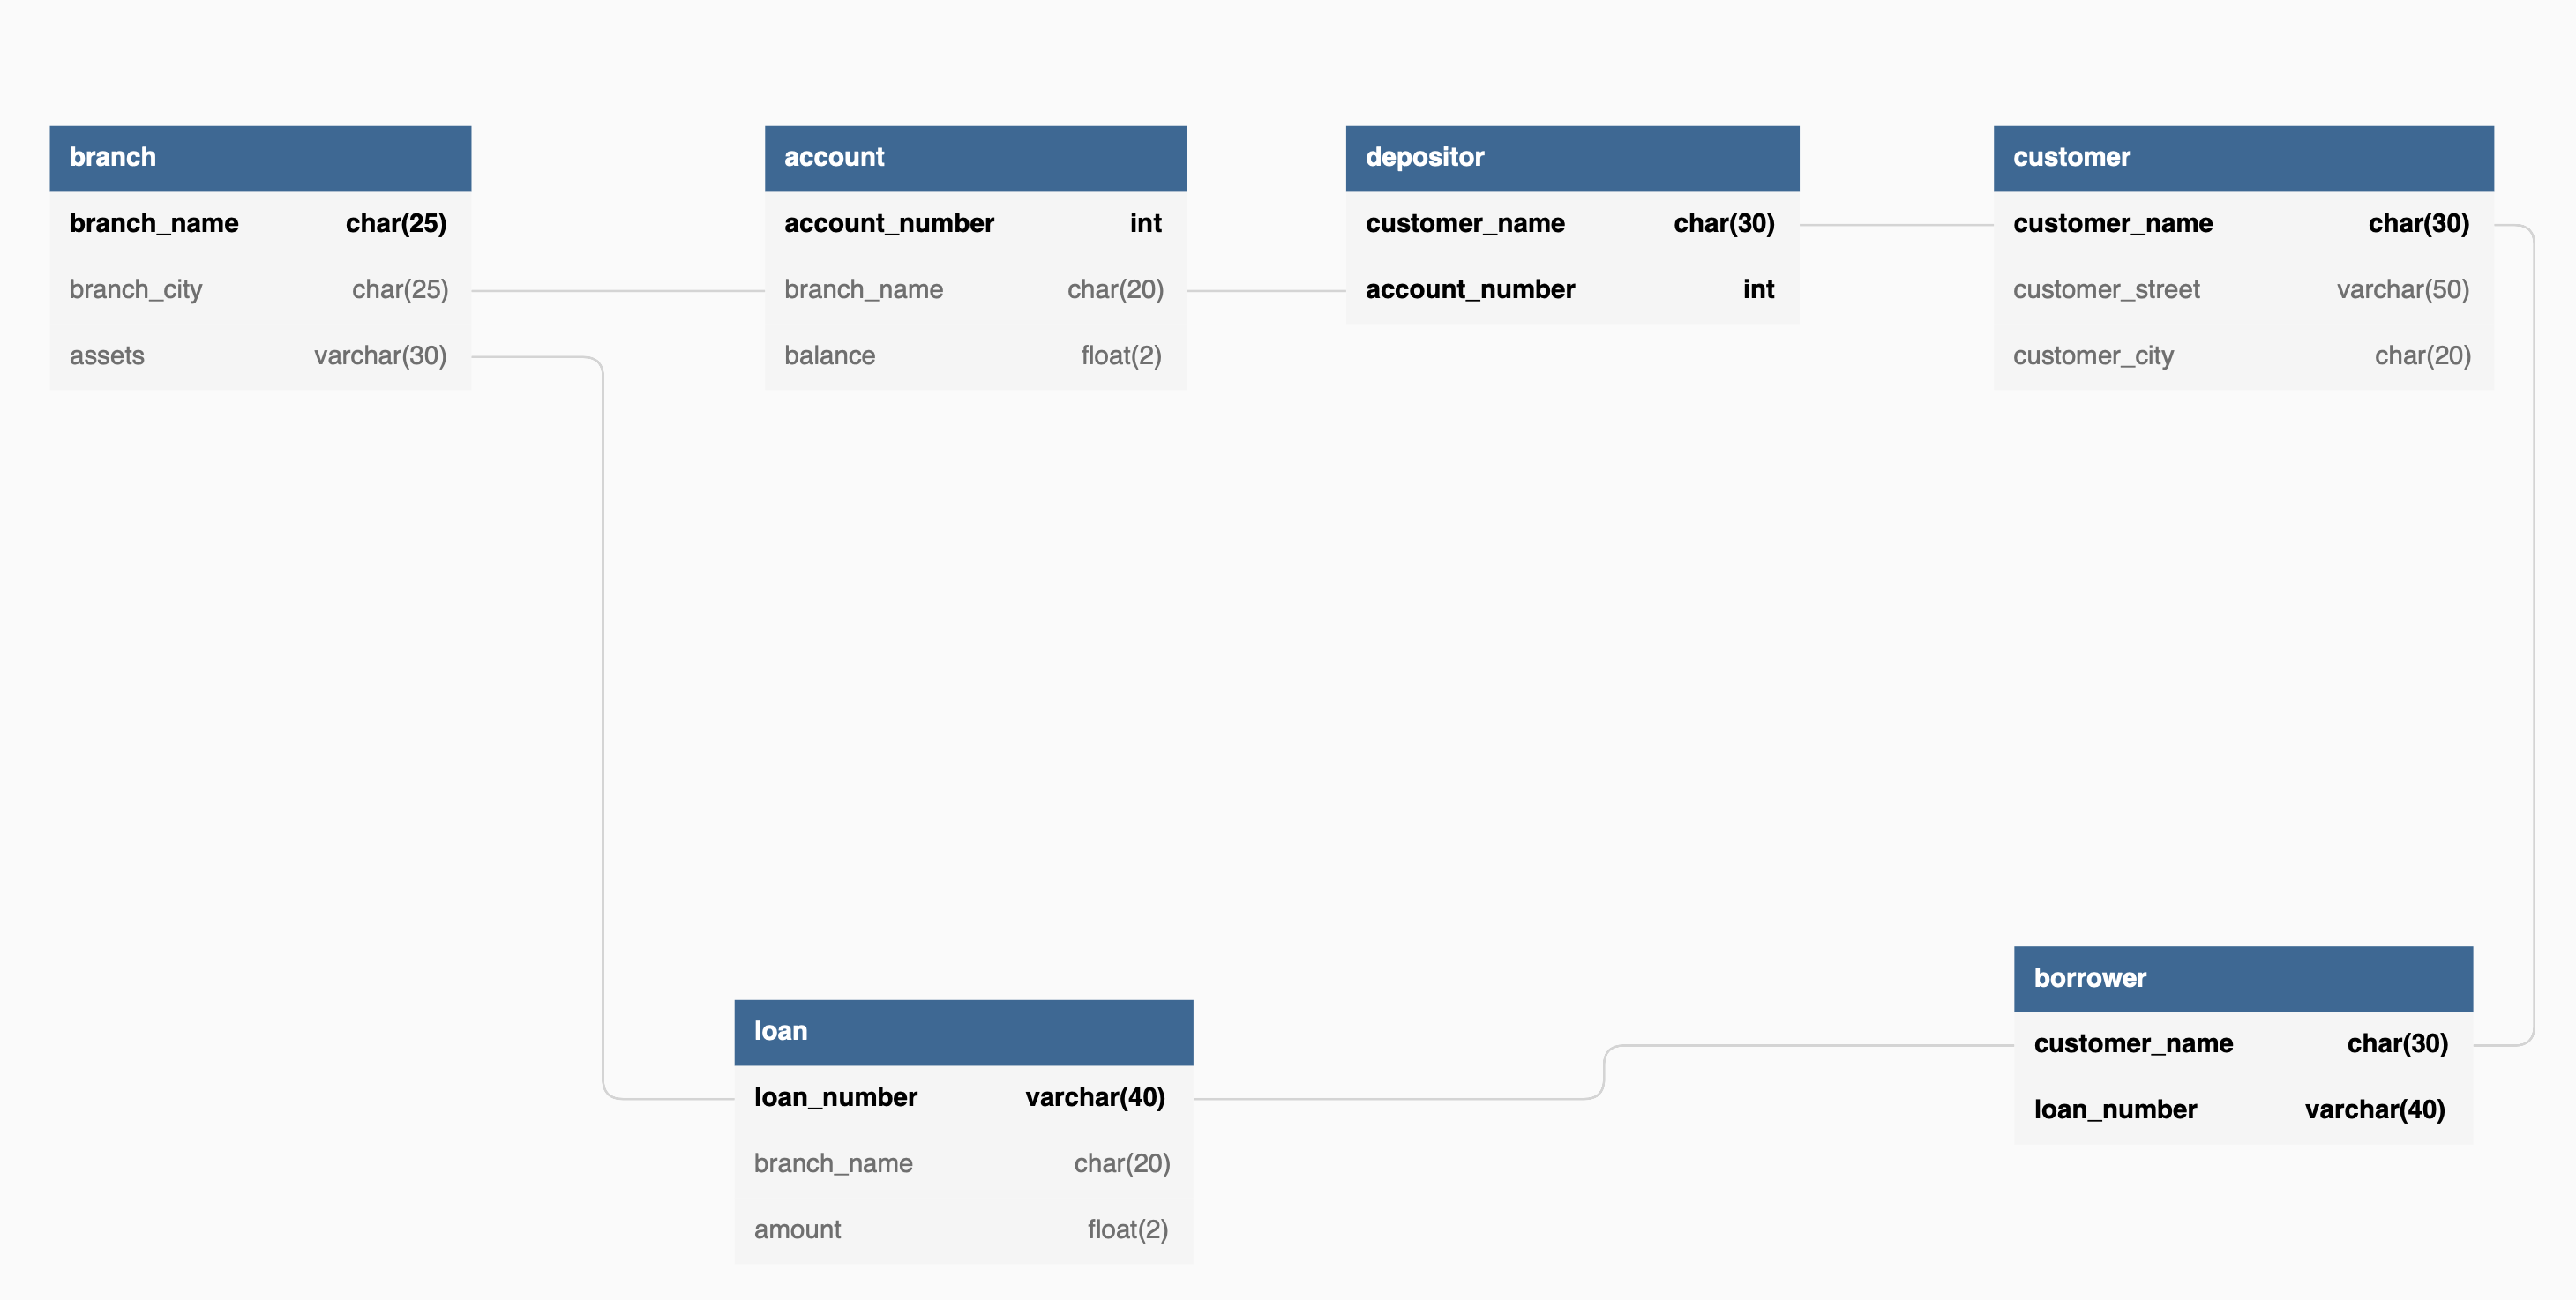

# 3)

In [3]:
pip install mysql-connector-python

     |████████████████████████████████| 342 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 483 kB 22.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [41]:
import mysql.connector

def batch_execute_ddl ():

    file = open('bank_db.sql') # open and read a DDL File
    sql = file.read()
    cnx = mysql.connector.connect(
    user='Ankur',
    password=open("credentials.txt").read(),
    host='bank.cw2w4gcvc1md.us-east-1.rds.amazonaws.com',
    database='cse4020_db')
    cursor = cnx.cursor ()
    # multi allows us to execute multiple ddl statements
    for result in cursor.execute(sql , multi=True):
        
        if result.with_rows:
            print(f"Rows produced by statement ’{result.statement}’:")
            print(result.fetchall ())
        else:
            print(f"Number of rows affected by statement ’{result.statement}’: { result.rowcount}")
    cnx.close()
    
    
def main():
    connection = mysql.connector.connect(
    host = "bank.cw2w4gcvc1md.us-east-1.rds.amazonaws.com", # the host is the same as the AWS endpoint
    user="Ankur",
    password=open("credentials.txt").read(),
    database="" # you may remove the database parameter
    # if you intend to create it using your DDL.
    )
    cursor = connection.cursor ()

    batch_execute_ddl()

main()

ProgrammingError: 1050 (42S01): Table 'branch' already exists

I ran it for the second time. Sorry.

# 4)

In [44]:
from IPython.display import display, Markdown

def batch_execute_ddl(conn):
    query = "SHOW CREATE TABLE"
    table_names = [" branch", " account", " customer", " loan", " depositor", " borrower"]
    cursor = conn.cursor(buffered=True)
    ddl_file = open("bank_db.sql")
    sql = ddl_file.read()
    for result in cursor.execute(sql, multi=True):
        
        if result.with_rows:
            print(f"Rows produced: {result.statement}")
            print(result.fetchall())
        else:
            print(f"number of rows affected by statement {result.statement}: {result.rowcount}")
    display(Markdown("""
    cursor.execute(query + table_names[i] """))        
        
    conn.close()
    
def main():
    host = "bank.cw2w4gcvc1md.us-east-1.rds.amazonaws.com"
    user = "Ankur"
    password = open("credentials.txt").read()
    conn = mysql.connector.connect(host=host, 
                                   user=user, 
                                   password = password,
                                  database='cse4020_db')
    batch_execute_ddl(conn)
main()    

ProgrammingError: 1050 (42S01): Table 'branch' already exists